## Results

In [2]:

from data import *
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import swifter
from tqdm import tqdm
import regex as re

C:\Users\nxcle\anaconda3\envs\spartan\lib\site-packages\dask\dataframe\_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


In [9]:
args = didi.parse()
par = Params()
data = Data(par)

# load_dir = '/data/gpfs/projects/punim2119/EightK/res/temp/vec_pred/5e8b285d69edeee2833f1f2aa4d81ef00f787ed5188fcf557a54d04ad73af547/OPT_125m/NEWS_SINGLE/' # No Normalisation, Ret
# load_dir = '/data/gpfs/projects/punim2119/EightK/res/temp/vec_pred/23c308fffeb08a56e3eb4b0717303816005bafc70a823f1a45b92c2c9027ab88/OPT_125m/NEWS_SINGLE/' # No Normalisation, Abret
# load_dir = '/data/gpfs/projects/punim2119/EightK/res/temp/vec_pred/d7cc8fc49ceec47bf5ac309008d70a2ed2e1e7df992a46af4c24ecdaf9a71c85/OPT_125m/NEWS_SINGLE/' # Normalisation, Ret
# load_dir = '/data/gpfs/projects/punim2119/EightK/res/temp/vec_pred/94b11dd4cdedaa2336935ea8d1c0320df74fdba113fa2ffbae5c448a91abf9ac/OPT_125m/NEWS_SINGLE/' # large model 2019
#load_dir = '/data/gpfs/projects/punim2119/EightK/res/temp/vec_pred/8f0a05c1bb38a954d7defbe0ae7e0fb3725f1c97236de7c82f8f002924b05c2e/OPT_125m/NEWS_SINGLE/' # large model 2017
load_dir = "/data/gpfs/projects/punim2119/EightK/res/temp/vec_pred/8f0a05c1bb38a954d7defbe0ae7e0fb3725f1c97236de7c82f8f002924b05c2e/OPT_125m/NEWS_SINGLE/"

model_outputs = [os.path.join(load_dir, f) for f in os.listdir(load_dir) if re.match(r'\d+.p$', f)]
model_outputs

['/data/gpfs/projects/punim2119/EightK/res/temp/vec_pred/8f0a05c1bb38a954d7defbe0ae7e0fb3725f1c97236de7c82f8f002924b05c2e/OPT_125m/NEWS_SINGLE/2012.p',
 '/data/gpfs/projects/punim2119/EightK/res/temp/vec_pred/8f0a05c1bb38a954d7defbe0ae7e0fb3725f1c97236de7c82f8f002924b05c2e/OPT_125m/NEWS_SINGLE/2013.p',
 '/data/gpfs/projects/punim2119/EightK/res/temp/vec_pred/8f0a05c1bb38a954d7defbe0ae7e0fb3725f1c97236de7c82f8f002924b05c2e/OPT_125m/NEWS_SINGLE/2014.p',
 '/data/gpfs/projects/punim2119/EightK/res/temp/vec_pred/8f0a05c1bb38a954d7defbe0ae7e0fb3725f1c97236de7c82f8f002924b05c2e/OPT_125m/NEWS_SINGLE/2015.p',
 '/data/gpfs/projects/punim2119/EightK/res/temp/vec_pred/8f0a05c1bb38a954d7defbe0ae7e0fb3725f1c97236de7c82f8f002924b05c2e/OPT_125m/NEWS_SINGLE/2016.p',
 '/data/gpfs/projects/punim2119/EightK/res/temp/vec_pred/8f0a05c1bb38a954d7defbe0ae7e0fb3725f1c97236de7c82f8f002924b05c2e/OPT_125m/NEWS_SINGLE/2017.p',
 '/data/gpfs/projects/punim2119/EightK/res/temp/vec_pred/8f0a05c1bb38a954d7defbe0ae7e0fb

In [10]:
crsp = data.load_crsp_daily()
crsp_sorted = crsp.sort_values(by=['permno', 'date'])
crsp_sorted.head(10)

permno       date ticker    prc        ret    bid    ask  shrout
0   10001 1993-01-04   GFGC  14.50   0.035714  14.00  14.50  1080.0
1   10001 1993-01-05   GFGC -14.25  -0.017241  14.00  14.50  1080.0
2   10001 1993-01-06   GFGC -14.25   0.000000  14.00  14.50  1080.0
3   10001 1993-01-07   GFGC  14.50   0.017544  14.00  14.50  1080.0
4   10001 1993-01-08   GFGC  14.50   0.000000  14.00  14.50  1080.0
5   10001 1993-01-11   GFGC  14.50   0.000000  14.00  14.50  1080.0
6   10001 1993-01-12   GFGC -14.25  -0.017241  14.00  14.50  1080.0
7   10001 1993-01-13   GFGC  13.75  -0.035088  13.75  14.25  1080.0
8   10001 1993-01-14   GFGC  13.75   0.000000  13.75  14.25  1080.0
9   10001 1993-01-15   GFGC -14.00   0.018182  13.75  14.25  1080.0

In [14]:
# read df from pickle
#date should be in datetime64[ns]
df = pd.read_pickle(model_outputs[0]).rename(columns={'ticker':'permno'})
df['date'] = pd.to_datetime(df['date'])
df.rename(columns={'date': 'date_news'}, inplace=True)
df.head(50)

id  date_news  permno    y_true    y_pred
0   20120103-001514000-nL1E8C3003-1-1 2012-01-03   23819 -0.031313  0.002643
1   20120103-003939000-nL1E8C3003-1-2 2012-01-03   23819 -0.031313  0.003637
2   20120103-043854000-nL1E8C306Z-1-2 2012-01-03   23819 -0.031313  0.004162
3   20120103-085633000-nRTV359836-1-2 2012-01-03   23819 -0.031313  0.000762
4   20120103-091333000-nRTV359836-1-2 2012-01-03   23819 -0.031313  0.000762
5   20120103-015322000-nL3E8C302K-1-2 2012-01-03   13928  0.053519  0.002076
6    20120103-050934000-nWNAB9401-1-1 2012-01-03   13928  0.053519  0.002556
7    20120103-052712000-nWNAB9401-1-2 2012-01-03   13928  0.053519  0.002388
8    20120103-160745000-nWNAB9562-1-2 2012-01-03   13928  0.053519 -0.003825
9    20120103-044344000-nWNAB9395-1-1 2012-01-03   68591  0.055104  0.008343
10   20120103-044704000-nWNAB9395-1-2 2012-01-03   68591  0.055104 -0.017711
11   20120103-213001000-nASA03EB7-1-1 2012-01-03   68591  0.055104  0.002951
12   20120103-045219000-nWNAB9397-1-1 2012-01-03   77610 -0.334673  0.004853
13   20120103-045247000-nWNAB9397-1-2 2012-01-03   77610 -0.334673 -0.022304
14  20120103-161419000-nL3E8C3766-1-2 2012-01-03   77610 -0.334673  0.039987
15   20120103-045308000-nWNAB9398-1-1 2012-01-03   83661  0.044559  0.008666
16   20120103-045349000-nWNAB9398-2-1 2012-01-03   83661  0.044559  0.005475
17   20120103-045401000-nWNAB9398-3-1 2012-01-03   83661  0.044559  0.006809
18   20120103-045633000-nWNAB9398-1-2 2012-01-03   83661  0.044559  0.001974
19  20120103-045955000-nL3E8C3262-1-2 2012-01-03   11990  0.109409  0.003781
20   20120103-050932000-nWNAB9400-1-1 2012-01-03   13688 -0.029112  0.007043
21   20120103-051012000-nWNAB9400-2-1 2012-01-03   13688 -0.029112  0.006878
22   20120103-051118000-nWNAB9402-1-1 2012-01-03   21776 -0.089984  0.007030
23   20120103-051228000-nWNAB9402-1-2 2012-01-03   21776 -0.089984 -0.024304
24  20120103-163234000-nRTV381050-1-2 2012-01-03   21776 -0.089984 -0.005618
25  20120103-201645000-nL1E8C37G4-1-2 2012-01-03   21776 -0.089984  0.052192
26   20120103-060006000-nASA03E40-1-1 2012-01-03   84604  0.000000  0.005547
27   20120103-060609000-nWNAB9404-1-1 2012-01-03   60506  0.106477  0.015385
28   20120103-061535000-nWNAB9404-1-2 2012-01-03   60506  0.106477 -0.043827
29   20120103-215800000-nASA03EBK-1-1 2012-01-03   60506  0.106477  0.009445
30   20120103-060817000-nWNAB9408-1-1 2012-01-03   77453  0.156532  0.008860
31   20120103-061559000-nWNAB9408-1-2 2012-01-03   77453  0.156532  0.027406
32   20120103-060959000-nWNAB9409-1-1 2012-01-03   86111 -0.059961  0.003383
33   20120103-061248000-nWNAB9409-1-2 2012-01-03   86111 -0.059961 -0.022151
34   20120103-061018000-nWNAB9410-1-1 2012-01-03   12865  0.366785  0.008577
35   20120103-061036000-nWNAB9410-2-1 2012-01-03   12865  0.366785  0.008169
36   20120103-062226000-nWNAB9410-1-2 2012-01-03   12865  0.366785  0.032513
37   20120103-061427000-nWNAB9411-1-1 2012-01-03   25785  0.103082  0.002584
38  20120103-144610000-nL6E8C31OR-1-2 2012-01-03   25785  0.103082  0.003732
39  20120103-155033000-nL6E8C31OR-1-2 2012-01-03   25785  0.103082  0.002733
40   20120103-061844000-nWNAB9412-1-1 2012-01-03   88343  0.197835  0.003684
41   20120103-061923000-nWNAB9412-2-1 2012-01-03   88343  0.197835  0.004753
42   20120103-062035000-nWNAB9412-1-2 2012-01-03   88343  0.197835  0.005550
43   20120103-213025000-nASA03EBE-1-1 2012-01-03   88343  0.197835  0.005998
44   20120103-213029000-nASA03EBE-2-1 2012-01-03   88343  0.197835  0.003200
45   20120103-213058000-nASA03EBE-3-1 2012-01-03   88343  0.197835  0.003296
46   20120103-213537000-nASA03EBE-1-2 2012-01-03   88343  0.197835  0.011567
47   20120103-062641000-nWNAB9413-1-1 2012-01-03   59328  0.035868  0.008196
48   20120103-062932000-nWNAB9414-1-1 2012-01-03   59328  0.035868  0.005579
49   20120103-063225000-nWNAB9415-1-1 2012-01-03   12795  0.263718  0.007684

In [19]:
(df['y_pred'] - df['y_true'])

<bound method Series.mean of 0         0.033956
1         0.034950
2         0.035475
3         0.032075
4         0.032075
            ...   
430448    0.029952
430449   -0.018092
430450    0.001124
430451    0.021222
430452    0.044017
Length: 430453, dtype: float32>

In [20]:
# Combine all years
dfs = []
for mo in model_outputs:
    df = pd.read_pickle(mo).rename(columns={'ticker':'permno'})
    df['date'] = pd.to_datetime(df['date'])
    df.rename(columns={'date': 'date_news'}, inplace=True)
    dfs.append(df)

df = pd.concat(dfs)

In [21]:
n_days_ahead = 1

print('Creating permno mapping')
crsp_grouped = crsp_sorted.groupby('permno')
permno_mapping = {}
permno_date_to_index_mapping = {}  # New mapping for date to index

for permno, group in tqdm(crsp_grouped):
    records = group[['date', 'prc', 'ret', 'bid', 'ask', 'shrout']].to_records(index=False)
    permno_mapping[permno] = records
    permno_date_to_index_mapping[permno] = {date: idx for idx, date in enumerate(group['date'])}


Creating permno mapping


100%|██████████| 14658/14658 [01:01<00:00, 238.43it/s]


In [22]:
# Function to perform binary search and get nth day return
def get_nth_day_return(row):
    permno = row['permno']
    date_news = row['date_news']

    trading_days = permno_mapping.get(permno, None)
    date_to_index = permno_date_to_index_mapping.get(permno, {})

    if trading_days is not None and date_news in date_to_index:
        start_index = date_to_index[date_news]
        nth_index = start_index + n_days_ahead

        if nth_index < len(trading_days):
            nth_day_data = trading_days[nth_index]
            return pd.Series({
                'date': nth_day_data.date,
                'prc': nth_day_data.prc,
                'ret': nth_day_data.ret,
                'bid': nth_day_data.bid,
                'ask': nth_day_data.ask,
                'shrout': nth_day_data.shrout
            })
    # Return default values if conditions are not met
    return pd.Series({
        'date': pd.NaT,
        'prc': None,
        'ret': None,
        'bid': None,
        'ask': None,
        'shrout': None
    })

tqdm.pandas(desc="Processing rows")
additional_columns = df.progress_apply(get_nth_day_return, axis=1)
for col in ['prc', 'ret', 'bid', 'ask', 'shrout']:
    additional_columns[col] = pd.to_numeric(additional_columns[col], errors='coerce')
df_merged = pd.concat([df, additional_columns], axis=1)
df_merged.rename(columns={'date': 'date_trade'}, inplace=True)
df_merged

Processing rows: 100%|██████████| 3368524/3368524 [07:33<00:00, 7427.43it/s] 


id  date_news  permno    y_true    y_pred date_trade     prc       ret        bid        ask    shrout
0                       20120103-001514000-nL1E8C3003-1-1 2012-01-03   23819 -0.031313  0.002643 2012-01-04   35.12  0.028404   35.11000   35.12000  920165.0
1                       20120103-003939000-nL1E8C3003-1-2 2012-01-03   23819 -0.031313  0.003637 2012-01-04   35.12  0.028404   35.11000   35.12000  920165.0
2                       20120103-043854000-nL1E8C306Z-1-2 2012-01-03   23819 -0.031313  0.004162 2012-01-04   35.12  0.028404   35.11000   35.12000  920165.0
3                       20120103-085633000-nRTV359836-1-2 2012-01-03   23819 -0.031313  0.000762 2012-01-04   35.12  0.028404   35.11000   35.12000  920165.0
4                       20120103-091333000-nRTV359836-1-2 2012-01-03   23819 -0.031313  0.000762 2012-01-04   35.12  0.028404   35.11000   35.12000  920165.0
...                                                   ...        ...     ...       ...       ...        ...     ...       ...        ...        ...       ...
579549  GNX25Z3vm_1809282/C2MYyYoGWfz6B13081np1Ko5zpr8... 2018-09-28   14707  0.001755  0.009045 2018-10-01   18.80  0.056180   18.81000   18.82000   45540.0
579550  GNX1Q3B3d_1809282DIJ2huMTjdb3r3SYnnjYOmmqeNLgQ... 2018-09-28   13527  0.032644  0.006143 2018-10-01  128.13 -0.014839  128.13000  128.14000   55727.0
579551  GNX1csn08_1809282EaSxDzB8DftmQSScKaQma2xQ3Phby... 2018-09-28   12623  0.001048  0.006064 2018-10-01  257.38  0.005077  257.29999  257.31000   43318.0
579552  GNX1Kv7vX_1809282Jz2Gupn9embV6CtoKXb0Q32JKHGC7... 2018-09-28   87267 -0.041214  0.005953 2018-10-01  473.47  0.004540  473.47000  473.51001  159584.0
579553  GNX1cnzG8_18092824D7jJJiW5YTKMgYV7azuafS1EEFY1... 2018-09-28   14026 -0.312000  0.007220 2018-10-01    6.69  0.115000    6.63000    6.64000    4902.0

[3368524 rows x 11 columns]

In [26]:
df_grouped =df_merged.groupby(['permno','date_news'])[['ret','y_pred','y_true', 'prc']].mean().reset_index()

df_grouped['year'] = df_grouped['date_news'].dt.year
print(df_grouped.groupby('year')['y_pred'].mean())
df_grouped['tresh'] = df_grouped.groupby('year')['y_pred'].transform('mean')

year
2012    0.007531
2013    0.006516
2014    0.003284
2015    0.017459
2016    0.008668
2017    0.013630
2018    0.010409
Name: y_pred, dtype: float32


In [29]:
df_grouped['pred'] = df_grouped['y_pred_prb']>df_grouped['tresh']
# df_grouped['pred'] = df_grouped['y_pred_prb']>0.5
df_grouped['accuracy']=df_grouped['pred']==df_grouped['y_true']

KeyError: 'y_pred_prb'

In [48]:
df_merged['accuracy'].mean()

0.5129475105417091

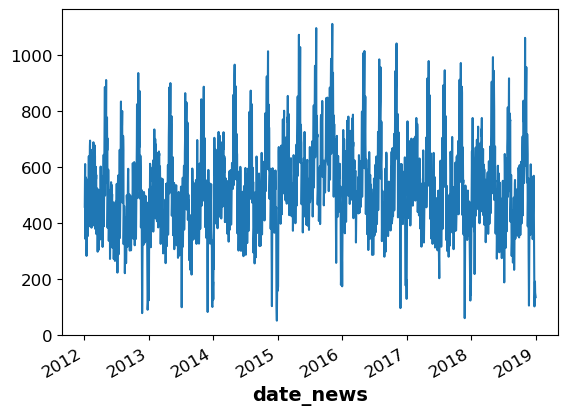

In [27]:

df_grouped.groupby('date_news')['permno'].count().plot()
df_grouped['pct']=df_grouped.groupby('date_news')['y_pred'].rank(pct=True)

In [30]:
df_grouped

permno  date_news       ret    y_pred    y_true        prc  year     tresh       pct
0        10002 2012-01-31  0.000000  0.005274 -0.068678    1.28000  2012  0.007531  0.550247
1        10002 2012-03-21 -0.181879  0.005223  0.020303    1.21900  2012  0.007531  0.529138
2        10002 2012-03-29  0.207629  0.007624 -0.071499    1.45000  2012  0.007531  0.722338
3        10002 2012-04-30  0.105769  0.005546 -0.014339    2.30000  2012  0.007531  0.520896
4        10002 2012-06-15  0.003390  0.146541  0.041226    2.96000  2012  0.007531  0.996310
...        ...        ...       ...       ...       ...        ...   ...       ...       ...
967516   93436 2018-12-24  0.103930 -0.042447 -0.228663  326.09000  2018  0.010409  0.079208
967517   93436 2018-12-26 -0.030544  0.025105  0.311955  316.13000  2018  0.010409  0.888889
967518   93436 2018-12-27  0.056116 -0.003480 -0.091691  333.87000  2018  0.010409  0.068421
967519   93436 2018-12-28 -0.003205  0.028519  0.168426  332.79999  2018  0.010409  0.906667
967520   93436 2018-12-31 -0.068149  0.013292 -0.009642  310.12000  2018  0.010409  0.656716

[967521 rows x 9 columns]

In [51]:
confusion_matrix(df_grouped['y_true'], df_grouped['pred'])

array([[215616, 238361],
       [246190, 267354]], dtype=int64)

<Axes: xlabel='date_news'>

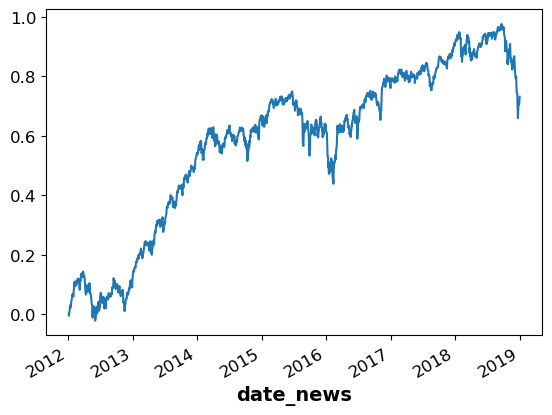

In [52]:
df_grouped.groupby(['date_news'])['ret'].mean().cumsum().plot()

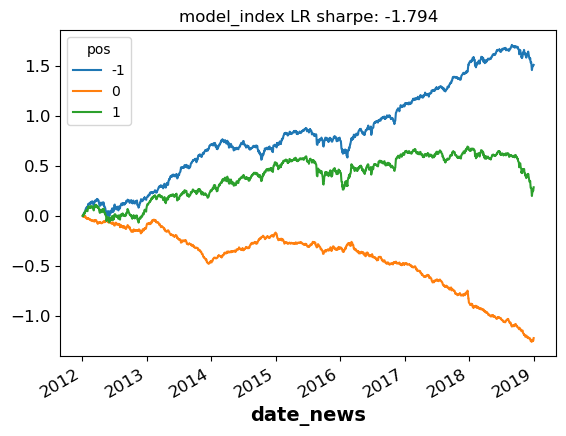

In [53]:
tresh = 0.2
df_grouped['pos'] = 1*(df_grouped['pct']>(1-tresh)) - (df_grouped['pct']<=tresh)*1
ret=df_grouped.groupby(['date_news','pos'])['ret'].mean().reset_index().pivot(columns='pos',index='date_news',values='ret')
ret[0] = ret[1]-ret[-1]
ret.cumsum().plot()
sh = np.sqrt(252)*(ret.mean()/ret.std()).round(3)
plt.title(f'model_index {"LR"} sharpe: {np.round(sh[0],3)}')
plt.show()

In [54]:
# index ret by [1, -1, 0]
ret_formated = ret[[1, -1, 0]]
sh_formated = np.sqrt(252)*(ret_formated.mean()/ret_formated.std()).round(3)
print("        ", "Long", "Short", "L-S", sep="\t")
print("Return: ", *list((252 * ret_formated.mean()).round(3)), sep="\t")
print("Std:    ", *list((np.sqrt(252)*ret_formated.std()).round(3)), sep="\t")
print("Sharpe: ", *list(sh_formated.round(3)), sep="\t")

        	Long	Short	L-S
Return: 	0.041	0.216	-0.175
Std:    	0.172	0.158	0.098
Sharpe: 	0.238	1.365	-1.794
